## Отчет по ЛР 3

**Выполнил**: Стрыгин Денис Дмитриевич

---

1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic  (или в других источниках) предположительно зависимые данные (например: «доля людей в возрасте 70+» и «приверженность жителей тех к ЗОЖ» по регионам), посчитать коэффициент корреляции, оценить меру связи.
Построить гистограммы рассеяния, линию аппроксимации  и посчитать величину достоверности аппроксимации R^2.

Мой датасет взят с [Kaggle](https://www.kaggle.com/datasets/albertovidalrod/gapminder-dataset). В нём собраны экономические и социальные характеристики стран

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_csv("./gapminder_data_graphs.csv")
df = df.dropna()
df.head()

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6
5,Afghanistan,Asia,2003,56.5,0.393,0.0509,346.0,25.9
6,Afghanistan,Asia,2004,57.1,0.409,0.0368,336.0,26.1
7,Afghanistan,Asia,2005,57.6,0.418,0.0515,360.0,26.5
8,Afghanistan,Asia,2006,58.0,0.429,0.0622,368.0,26.9


Гипотеза: ВВП влияет на продолжительсноть жизни

#### Посчитать коэффициент корреляции, оценить меру связи.

In [13]:
def calculate_mean(series):
    total_sum = series.sum()
    return total_sum / len(series)

def calculate_covariance(variable_x, variable_y):
    mean_x = calculate_mean(variable_x)
    mean_y = calculate_mean(variable_y)
    return calculate_mean((variable_x - mean_x) * (variable_y - mean_y))

def calculate_central_moment(series, order=2):
    mean_series = calculate_mean(series)
    return calculate_mean((series - mean_series) ** order)

def calculate_variance(series):
    return calculate_central_moment(series, order=2)

def calculate_correlation(variable_x, variable_y):
    covariance_xy = calculate_covariance(variable_x, variable_y)
    std_dev_x = calculate_variance(variable_x) ** 0.5
    std_dev_y = calculate_variance(variable_y) ** 0.5
    return covariance_xy / (std_dev_x * std_dev_y)

print("Корреляция: ", calculate_correlation(df["life_exp"], df["gdp"]))

Корреляция:  0.5864761196965175


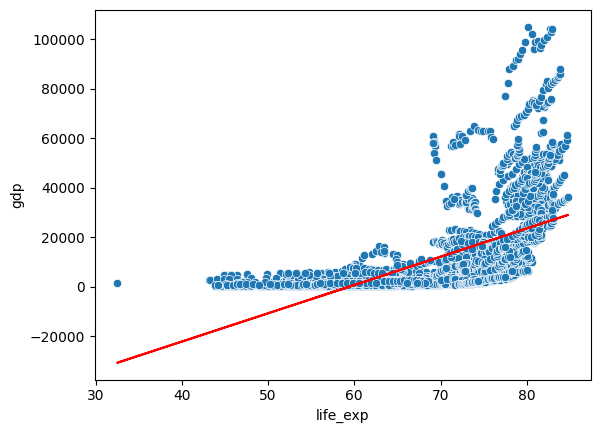

Коэффициент детерминации (R^2): 0.3439542389742838


In [15]:
def calculate_r2_score(actual_y, predicted_y):
    mean_y = calculate_mean(actual_y)
    total_sum_of_squares = sum((actual_y - mean_y) ** 2)
    regression_sum_of_squares = sum((predicted_y - mean_y) ** 2)
    return regression_sum_of_squares / total_sum_of_squares

def display_info(dataframe, feature_x, feature_y):
    sns.scatterplot(data=dataframe, x=feature_x, y=feature_y)

    x_values = dataframe[feature_x]
    y_values = dataframe[feature_y]

    coefficients = np.polyfit(x_values, y_values, 1)
    regression_line = np.poly1d(coefficients)
    plt.plot(x_values, regression_line(x_values), "r")

    plt.show()

    r_squared = calculate_r2_score(y_values, regression_line(x_values))
    print("Коэффициент детерминации (R^2):", r_squared)
    
display_info(df, "life_exp", "gdp")

График показывает низкую достоверность. Это позволяет утверждать, что продолжительность жизни, хоть и имеет связь с ВВП, но в сухом остатке не оказывает на это решающее влияние. Для сравнения, можно исследовать показатели связи между ИЧР и продолжительностью жизни, там прослеживается более четкая связь, но это было слишком предсказуемо

Корреляция:  0.8895923121917794


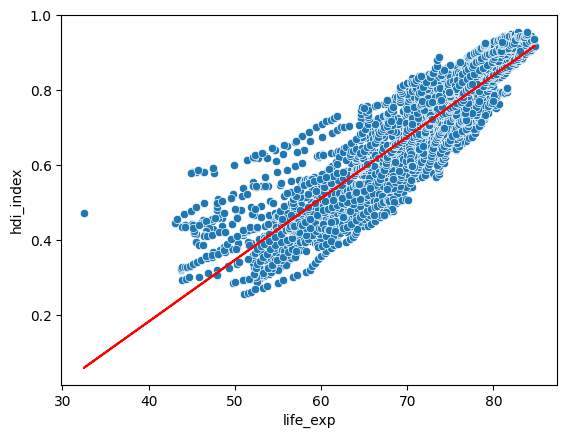

Коэффициент детерминации (R^2): 0.7913744819107167


In [16]:
print("Корреляция: ", calculate_correlation(df["life_exp"], df["hdi_index"]))
display_info(df, "life_exp", "hdi_index")

2.	Найти датасет с объемом ~100 наблюдений (и более), сделать выборку =~ 1/3 наблюдений 
1) случайным образом, 
2) сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию, например, для регионов стратами могут быть федеральные округа). 

In [28]:
def random_sample(df, size_percent):
    return df.sample(frac=size_percent)

df_rand = random_sample(df, 1/3)

In [32]:
def strat_sample(df, group_by, target_column, size_percent):
    df_groupby = df.groupby(by=group_by, group_keys=False)
    
    def sample_group(group):
        sample_size = max(int(len(group) * size_percent), 1)  # Округляем в большую сторону, чтобы взять хотя бы одно значение
        return group.sample(n=sample_size)
    
    df_groupby_random = df_groupby.apply(sample_group)
    
    return df_groupby_random[[group_by, target_column]].reset_index(drop=True)

df_stat = strat_sample(df, "country", "life_exp", 1/3)

/tmp/ipykernel_9035/496383473.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_groupby_random = df_groupby.apply(sample_group)


Случайная выборка
Размер df: 3532 | Размер df_sample: 1177 | Отношение: 0.33


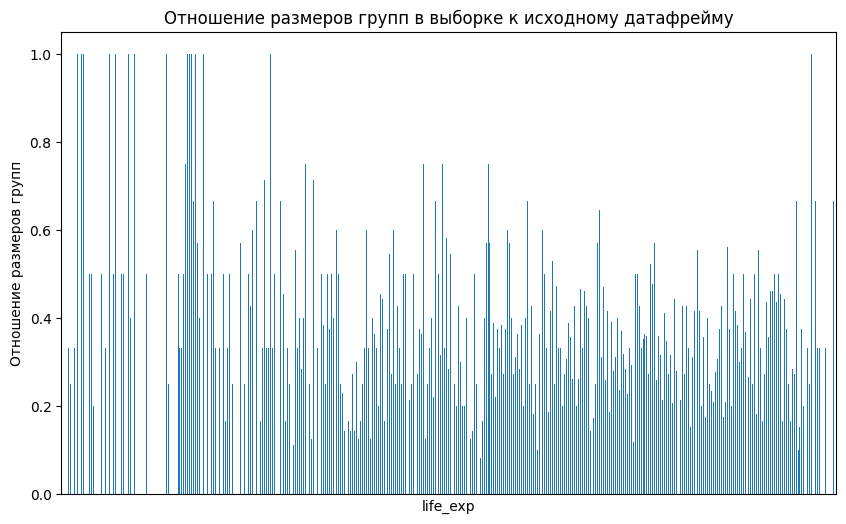


Стратифицированная выборка
Размер df: 3532 | Размер df_sample: 1165 | Отношение: 0.33


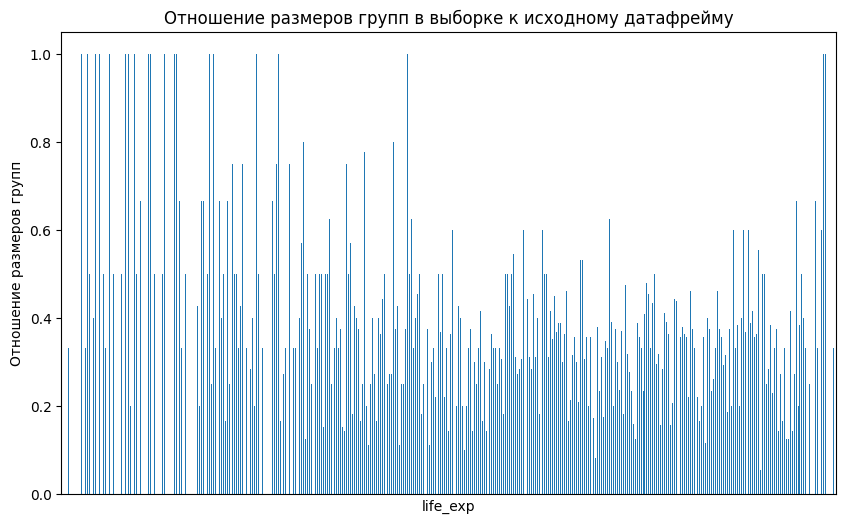

In [33]:
def plot_group_ratios(df, df_sample, group_by, title):
    print(title)
    print(f"Размер df: {len(df)} | Размер df_sample: {len(df_sample)} | Отношение: {len(df_sample) / len(df):.2f}")

    sample_vc = df_sample[group_by].value_counts()
    df_vc = df[group_by].value_counts()

    ratio = (sample_vc / df_vc).fillna(0)

    ratio.plot(kind='bar', figsize=(10, 6))
    plt.xticks([])
    plt.ylabel('Отношение размеров групп')
    plt.title('Отношение размеров групп в выборке к исходному датафрейму')
    plt.show()

    print()

plot_group_ratios(df, df_rand, "life_exp", "Случайная выборка")
plot_group_ratios(df, df_stat, "life_exp", "Стратифицированная выборка")

3.	Посчитать 
1) среднее значение по выборкам из п.2 (2.1)случайной и 2.2)стратифицированной), 
2) доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
 Сравнить среднее генеральной выборки п.2  с полученными в выборках 2.1) и 2.2)  и с границами доверительных интервалов из п.3.2).

In [52]:
print(df_rand['life_exp'].mean())
print(df_stat['life_exp'].mean())
print(df['life_exp'].mean())

70.14001699235344
70.12248927038628
70.08892978482446


In [45]:
def calculate_mean_ci(data, confidence_level=0.95):
    array_data = np.array(data)
    sample_size = len(array_data)
    sample_mean = np.mean(array_data)
    standard_error = scipy.stats.sem(array_data)
    margin_of_error = standard_error * scipy.stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return sample_mean, confidence_interval

def display_mean_ci(data, y_position, confidence_level=0.95, ci_color="red"):
    mean, (ci_lower, ci_upper) = calculate_mean_ci(data, confidence_level=confidence_level)
    plt.scatter(mean, y_position, color=ci_color)
    plt.plot((ci_lower, ci_upper), (y_position, y_position), 'ro-', color=ci_color)

/tmp/ipykernel_9035/3012680269.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((ci_lower, ci_upper), (y_position, y_position), 'ro-', color=ci_color)


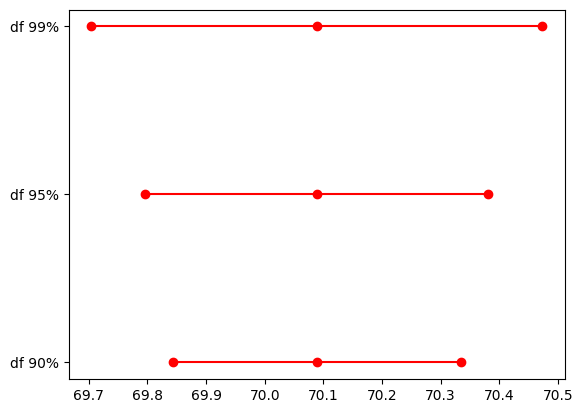

In [46]:
display_mean_ci(df["life_exp"], "df 90%", 0.9)
display_mean_ci(df["life_exp"], "df 95%", 0.95)
display_mean_ci(df["life_exp"], "df 99%", 0.99)
plt.show()

/tmp/ipykernel_9035/3012680269.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((ci_lower, ci_upper), (y_position, y_position), 'ro-', color=ci_color)


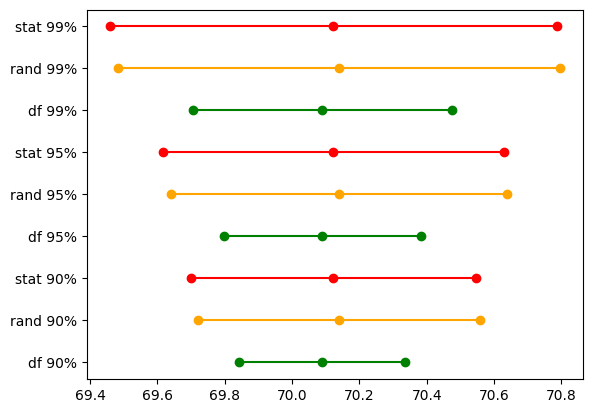

In [50]:
display_mean_ci(df["life_exp"], "df 90%", 0.9, "green")
display_mean_ci(df_rand["life_exp"], "rand 90%", 0.9, "orange")
display_mean_ci(df_stat["life_exp"], "stat 90%", 0.9)
display_mean_ci(df["life_exp"], "df 95%", 0.95, "green")
display_mean_ci(df_rand["life_exp"], "rand 95%", 0.95, "orange")
display_mean_ci(df_stat["life_exp"], "stat 95%", 0.95)
display_mean_ci(df["life_exp"], "df 99%", 0.99, "green")
display_mean_ci(df_rand["life_exp"], "rand 99%", 0.99, "orange")
display_mean_ci(df_stat["life_exp"], "stat 99%", 0.99)
plt.show()

#### Выводы:
Стратифицированная выборка является наиболее объективной при оценке малой части данных. Её значения приближены к оригинальной, потому при работе с big data наилучшем способом оценки будет использование стратификации. Показатели среднего значения и доверительных интервалов доказывают её выгоду перед простым рандомом